In [38]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load the Uber customer reviews dataset
df = pd.read_csv(r"C:\Users\DELL\Downloads\archive (6)\uber_reviews_without_reviewid.csv")

In [40]:
# Display the first few rows
print(df.head())

# Get an overview of the dataset
print(df.info())
print(df.describe())

  userName  userImage          content  score  thumbsUpCount  \
0   User_0        NaN             Good      5              0   
1   User_1        NaN             Nice      5              0   
2   User_2        NaN  Very convenient      5              0   
3   User_3        NaN             Good      4              0   
4   User_4        NaN         exllence      5              0   

  reviewCreatedVersion                   at replyContent repliedAt  \
0          4.556.10005  2024-12-18 17:17:19          NaN       NaN   
1          4.556.10005  2024-12-18 17:17:17          NaN       NaN   
2          4.532.10001  2024-12-18 17:09:42          NaN       NaN   
3          4.556.10005  2024-12-18 17:08:27          NaN       NaN   
4          4.556.10005  2024-12-18 17:08:16          NaN       NaN   

    appVersion  
0  4.556.10005  
1  4.556.10005  
2  4.532.10001  
3  4.556.10005  
4  4.556.10005  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (to

In [41]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if necessary)
df_cleaned = df.dropna()

# Verify the cleaned dataset
print(df_cleaned.info())

userName                    0
userImage               12000
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion     1740
at                          0
replyContent            11967
repliedAt               11967
appVersion               1740
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userName              0 non-null      object 
 1   userImage             0 non-null      float64
 2   content               0 non-null      object 
 3   score                 0 non-null      int64  
 4   thumbsUpCount         0 non-null      int64  
 5   reviewCreatedVersion  0 non-null      object 
 6   at                    0 non-null      object 
 7   replyContent          0 non-null      object 
 8   repliedAt             0 non-null      object 
 9   appVersion            0 non-null 

In [42]:
# Summary statistics for numerical columns
print(df_cleaned.describe())

# Count the number of reviews by rating (if a 'rating' column exists)
if 'rating' in df_cleaned.columns:
    print(df_cleaned['rating'].value_counts())

       userImage  score  thumbsUpCount
count        0.0    0.0            0.0
mean         NaN    NaN            NaN
std          NaN    NaN            NaN
min          NaN    NaN            NaN
25%          NaN    NaN            NaN
50%          NaN    NaN            NaN
75%          NaN    NaN            NaN
max          NaN    NaN            NaN


In [43]:
# Display a random sample of reviews from the 'content' column
df['content'].sample(5)

1703                                             Very bad
2577                                            very nice
1217    Once they went to reservation only! Worst idea...
4296                                   Nice experience...
9210    The driver not came on time that's I cancelled...
Name: content, dtype: object

In [44]:
# Step 1: Quantitative Analysis - Distribution of Review Scores

# Calculate the distribution of review scores
score_distribution = df['score'].value_counts().sort_index()

# Display the distribution
score_distribution

score
1    2618
2     317
3     333
4     806
5    7926
Name: count, dtype: int64

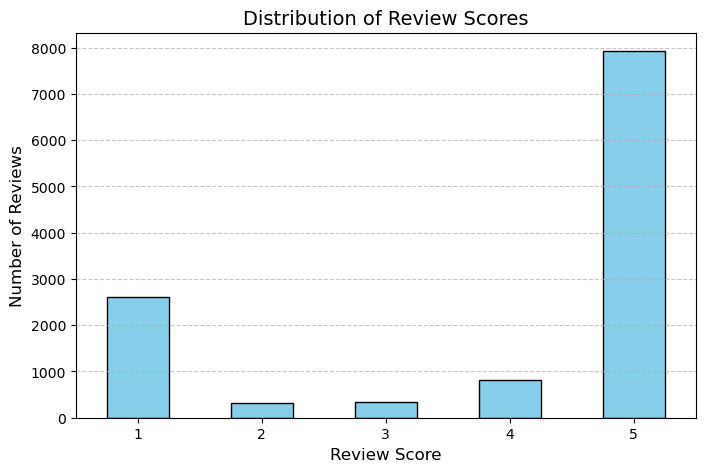

sentiment
Positive    8732
Negative    2935
Neutral      333
Name: count, dtype: int64

In [45]:
import matplotlib.pyplot as plt

# Step 2: Visualize the Score Distribution
plt.figure(figsize=(8, 5))
score_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Review Scores', fontsize=14)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 3: Classify Reviews into Positive, Neutral, and Negative
def classify_review(score):
    if score >= 4:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['score'].apply(classify_review)

# Count the number of reviews in each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Display the sentiment classification
sentiment_counts

In [47]:
pip install WordCloud

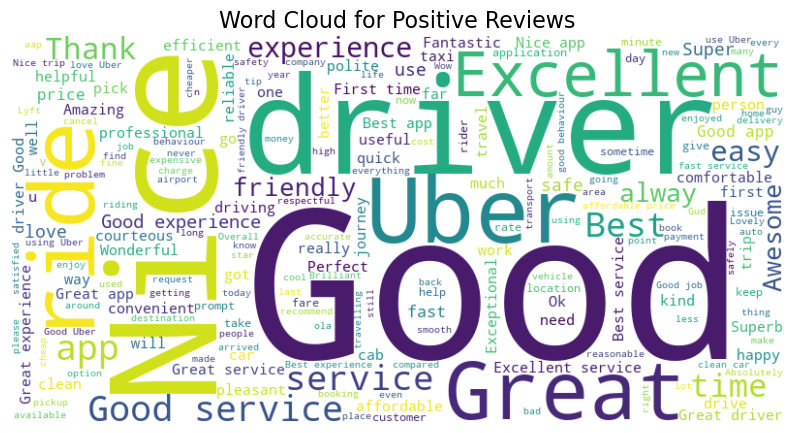

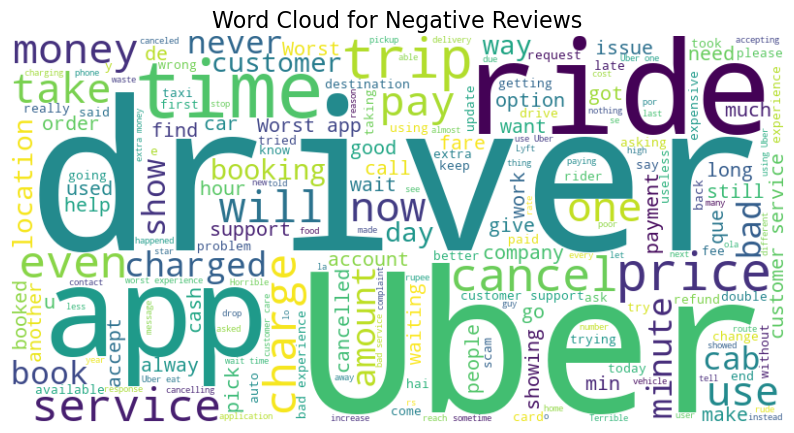

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate Word Clouds for Positive and Negative Reviews
def generate_wordcloud(sentiment):
    text = " ".join(df[df['sentiment'] == sentiment]['content'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Reviews', fontsize=16)
    plt.show()

# Word Cloud for Positive Reviews
generate_wordcloud('Positive')

# Word Cloud for Negative Reviews
generate_wordcloud('Negative')

In [49]:
from nltk.util import ngrams
from collections import Counter

# Extract Bigrams (two-word phrases) from Negative Reviews
negative_text = " ".join(df[df['sentiment'] == 'Negative']['content'].dropna())
negative_bigrams = list(ngrams(negative_text.split(), 2))
bigram_counts = Counter(negative_bigrams).most_common(10)
print("Top 10 Negative Review Bigrams:", bigram_counts)

Top 10 Negative Review Bigrams: [(('the', 'driver'), 178), (('I', 'have'), 174), (('the', 'ride'), 171), (('for', 'a'), 159), (('a', 'ride'), 155), (('to', 'get'), 141), (('the', 'app'), 140), (('this', 'app'), 132), (('in', 'the'), 131), (('of', 'the'), 126)]


In [57]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [59]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [60]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment_score'] = df['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize based on intensity
df['sentiment_category'] = df['sentiment_score'].apply(lambda x: 'Strong Positive' if x > 0.5 
                                                     else 'Positive' if x > 0 
                                                     else 'Neutral' if x == 0 
                                                     else 'Negative' if x > -0.5 
                                                     else 'Strong Negative')

# Display sentiment categories
print(df['sentiment_category'].value_counts())

sentiment_category
Positive           4501
Strong Positive    3590
Neutral            1732
Strong Negative    1291
Negative            886
Name: count, dtype: int64


In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Step 1: Vectorize the text data
vectorizer = CountVectorizer(stop_words='english', max_features=1000)  # Limit features to top 1000 for efficiency
text_vectorized = vectorizer.fit_transform(df['content'].dropna())

# Step 2: Apply Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Specify number of topics (e.g., 5)
lda.fit(text_vectorized)

# Step 3: Display Top Words for Each Topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("\n")

# Get feature names and display topics
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words=10)

Topic 1:
uber drivers ride driver time app service cancel just use


Topic 2:
app driver ride trip time worst bad money don customer


Topic 3:
good service great excellent driver experience friendly safe app ride


Topic 4:
best app easy price awesome uber super que use prices


Topic 5:
nice app uber love better ride support hai experience ola




In [64]:
#Calculating NPS
#define the categories based on the ratings
df ['NPS Category'] = df ['score'].apply(lambda x: 'Promoter' if x == 5 else ('Passive' if x == 4 else 'Detractor'))

#calculate the percentage of each category
nps_counts = df ['NPS Category'].value_counts(normalize=True) * 100

#calculate NPS
nps_score = nps_counts.get('Promoter', 0) - nps_counts.get('Detractor', 0)

#display the NPS score
nps_score

38.81666666666666